# RT626 HW1 #1 Keggle 이미지 세트를 활용하여 CNN 구성하기 
## Directory 구조 조정하기

기본 데이터셋에는 25000장의 사진이 있는데 문제에서 제시한 바와 같이 Train에 1000장 Validation에 500장 Test에 500장을 할당하는 과정을 진행

In [2]:
import os, shutil

exec_path = os.getcwd()
root_path = os.path.join(exec_path,'dataset\\dogs-vs-cats')

origin_trainset_path = os.path.join(root_path,'train')

new_trainset_path = os.path.join(root_path,'n_train')
new_validationset_path = os.path.join(root_path,'n_validation')
new_testset_path = os.path.join(root_path,'n_test')

if not(os.path.isdir(new_trainset_path)):
    os.mkdir(new_trainset_path)
if not(os.path.isdir(new_validationset_path)):
    os.mkdir(new_validationset_path)
if not(os.path.isdir(new_testset_path)):
    os.mkdir(new_testset_path)


## 필요한 File 복사하기
만들어진 Directory에 많은 양의 데이터에서 소량의 데이터만 가져오는 코드

In [3]:
if not(os.path.isfile(new_trainset_path+'\\0\\cat.0.jpg')):
    os.mkdir(new_trainset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\0\\cat.500.jpg')):
    os.mkdir(new_validationset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\0\\cat.750.jpg')):
    os.mkdir(new_testset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_trainset_path+'\\1\\dog.0.jpg')):
    os.mkdir(new_trainset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\1\\dog.500.jpg')):
    os.mkdir(new_validationset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\1\\dog.750.jpg')):
    os.mkdir(new_testset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'1'), fname)
        shutil.copy(src, dst)


## CNN 네트워크를 구성하기
이번 프로젝트에서는 Keras에서 제공하는 함수를 사용하여 CNN Layer를 생성하고 해당 네트워크를 학습함

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Network의 Hyperparameter를 설정하기
keras에서 제공하는 함수를 사용하여 Network를 설정한다.

In [6]:
from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Input 이미지를 정규화하기
이미지의 RGB 값은 알다시피 색상 별로 8-16bit 스케일로 표현된다. 활성함수는 대부분 이 값에 exponential한 값이 출력되기 때문에 input이 커지면 연산량도 많아진다. 따라서 이 값을 정규화하여 작은 스케일 [0,1]으로 선형 변환한다.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_trainset_path,
    target_size=(150, 150),
    batch_size=15,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    new_validationset_path,
    target_size=(150, 150),
    batch_size=15,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Network 학습시키기
앞서 Network의 형태는 함수를 이용해서 구성했다. 이후 학습에 사용될 이미지의 Path까지 함수를 이용하여 설정했다. 따라서 학습을 진행할 수 있다. 다음과 같은 코드를 통해서 네트워크를 학습시킬 수 있다.
HW1는 데이터 수가 적은 경우에도 효과적인 학습 진행을 위해서 Data Argumentation에 대해 공부하는 과제이다. 처음으로는 Data Argumentation없이 모델을 학습시키도록 하겠다.

### Non Data Argumentation
Non Data Argumentation학습은 주어진 Data를 갖고 학습을 진행하면 된다.

In [17]:
history = model.fit_generator(
    train_generator, epochs=60, 
    validation_data=validation_generator
    )

import datetime
_todaydateis = datetime.datetime.now().strftime("%y_%m_%d_%H%M")

model.save('nonargument'+ _todaydateis +'.h5')

Epoch 1/60
67/67 [==============================] - 8s 120ms/step - loss: 0.2611 - acc: 0.9030 - val_loss: 0.6419 - val_acc: 0.7240
Epoch 2/60
67/67 [==============================] - 8s 115ms/step - loss: 0.2431 - acc: 0.9030 - val_loss: 0.6301 - val_acc: 0.7300
Epoch 3/60
67/67 [==============================] - 8s 117ms/step - loss: 0.2068 - acc: 0.9270 - val_loss: 0.7284 - val_acc: 0.7180
Epoch 4/60
67/67 [==============================] - 7s 112ms/step - loss: 0.1909 - acc: 0.9290 - val_loss: 0.7099 - val_acc: 0.7160
Epoch 5/60
67/67 [==============================] - 8s 113ms/step - loss: 0.1710 - acc: 0.9370 - val_loss: 0.7618 - val_acc: 0.6940
Epoch 6/60
67/67 [==============================] - 8s 113ms/step - loss: 0.1490 - acc: 0.9570 - val_loss: 0.7705 - val_acc: 0.7140
Epoch 7/60
67/67 [==============================] - 7s 112ms/step - loss: 0.1274 - acc: 0.9630 - val_loss: 0.8283 - val_acc: 0.7100
Epoch 8/60
67/67 [==============================] - 7s 111ms/step - loss: 0.

### Data Argumentation
적은 Data로 효과적인 학습을 하기위해서 Data Argumentation을 진행한다. Argumentated된 데이터는 사진을 왜곡, 회전, 선현 변환하여 쉽게 얻을 수 있다. Keras는 이런 변환을 위한 함수를 제공한다.

In [15]:
import tensorflow

model_arg = tensorflow.keras.models.Sequential()
model_arg.add(tensorflow.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_arg.add(tensorflow.keras.layers.experimental.preprocessing.RandomRotation(0.05))
model_arg.add(tensorflow.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(64,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(128,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Conv2D(128,(3,3), activation='relu'))
model_arg.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model_arg.add(tensorflow.keras.layers.Flatten())
model_arg.add(tensorflow.keras.layers.Dense(512, activation='relu'))
model_arg.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

model_arg.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Data Argumentation을 적용한 모델을 학습시킨다. 학습의 hyperparameter는 Non Data Argumentation 모델과 똑같게 설정한다.

In [16]:
history_arg = model_arg.fit_generator(
    train_generator, epochs=30, 
    validation_data=validation_generator
    )

import datetime
_todaydateis = datetime.datetime.now().strftime("%y_%m_%d_%H%M")

model.save('argument'+ _todaydateis +'.h5')

Epoch 1/30
67/67 [==============================] - 8s 101ms/step - loss: 0.7811 - acc: 0.5228 - val_loss: 0.6825 - val_acc: 0.5320
Epoch 2/30
67/67 [==============================] - 6s 97ms/step - loss: 0.6532 - acc: 0.6087 - val_loss: 0.6523 - val_acc: 0.6200
Epoch 3/30
67/67 [==============================] - 7s 99ms/step - loss: 0.6411 - acc: 0.6372 - val_loss: 0.6531 - val_acc: 0.6020
Epoch 4/30
67/67 [==============================] - 7s 99ms/step - loss: 0.6390 - acc: 0.6540 - val_loss: 0.6195 - val_acc: 0.6720
Epoch 5/30
67/67 [==============================] - 7s 100ms/step - loss: 0.6139 - acc: 0.6803 - val_loss: 0.6217 - val_acc: 0.6580
Epoch 6/30
67/67 [==============================] - 7s 99ms/step - loss: 0.5866 - acc: 0.6842 - val_loss: 0.6287 - val_acc: 0.6480
Epoch 7/30
67/67 [==============================] - 7s 102ms/step - loss: 0.5791 - acc: 0.6970 - val_loss: 0.6340 - val_acc: 0.6580
Epoch 8/30
67/67 [==============================] - 7s 107ms/step - loss: 0.5796

## 학습 결과를 Visulize하기.
우리가 학습한 Network의 성능을 쉽게 알아볼 수 있도록 그래프를 이용해서 특성을 Plot한다.

### Non Data Argumentation 결과의 Plot



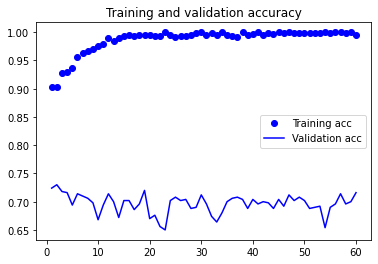

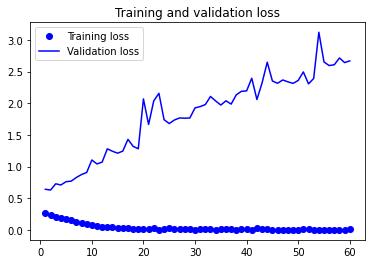

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Data Argumentation 결과의 Plot

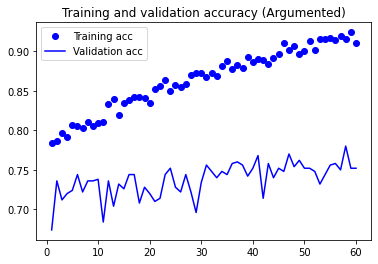

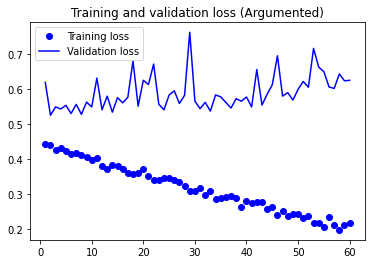

In [14]:
acc = history_arg.history['acc']
val_acc = history_arg.history['val_acc']
loss = history_arg.history['loss']
val_loss = history_arg.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy (Argumented)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss (Argumented)')
plt.legend()
plt.show()

## Pre-trained 모델을 활용한 CNN 성능 향상
아래 코드에서는 Google에서 사전에 Train한 MobileNet V2를 사용하여 사진 분류의 정확도를 향상시킨다. Keras는 MobileNet V2를 쉽게 사용하도록 함수를 제공한다.

### Base model을 구축하기

In [23]:
IMG_SIZE = 150
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tensorflow.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                        include_top=False,
                                                        weights='imagenet')

# base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Base_model layer와 함께 사용될 다른 Layer를 구성하기.

In [29]:
global_average_layer = tensorflow.keras.layers.GlobalAveragePooling2D()

prediction_layer = tensorflow.keras.layers.Dense(1)

### 모델 구축을 위해서 Layer들을 한 모델에 모으기

In [30]:
model_pretrained = tensorflow.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

### 학습 모델을 컴파일하여 생성하기

In [35]:
base_learning_rate = 0.0001
model_pretrained.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Pre-trained 모델을 활용하여 다시 학습하기

In [39]:
history_pt = model_pretrained.fit_generator(
    train_generator, epochs=60, 
    validation_data=validation_generator
    )

import datetime
_todaydateis = datetime.datetime.now().strftime("%y_%m_%d_%H%M")

model.save('pretrained'+ _todaydateis +'.h5')

c:\users\doore\onedrive - dgist.ac.kr\문서\projects\dgist-rt626\.rt626\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/60
67/67 [==============================] - 16s 240ms/step - loss: 2.7493e-04 - accuracy: 1.0000 - val_loss: 0.2257 - val_accuracy: 0.9560
Epoch 2/60
67/67 [==============================] - 17s 255ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9460
Epoch 3/60
67/67 [==============================] - 23s 349ms/step - loss: 0.0092 - accuracy: 0.9990 - val_loss: 0.2506 - val_accuracy: 0.9520
Epoch 4/60
67/67 [==============================] - 21s 316ms/step - loss: 0.0139 - accuracy: 0.9980 - val_loss: 0.2504 - val_accuracy: 0.9460
Epoch 5/60
67/67 [==============================] - 20s 302ms/step - loss: 1.5379e-04 - 

### Pre-trained 모델의 성능 Plot

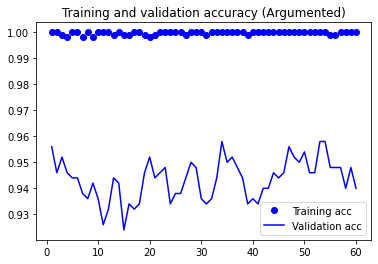

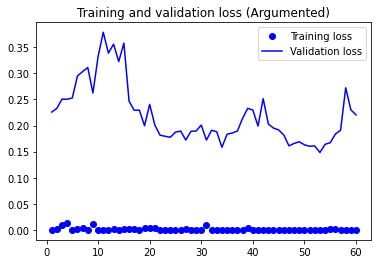

In [40]:
acc = history_pt.history['accuracy']
val_acc = history_pt.history['val_accuracy']
loss = history_pt.history['loss']
val_loss = history_pt.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy (Argumented)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss (Argumented)')
plt.legend()
plt.show()